<a href="https://colab.research.google.com/github/nyoons/ESAA/blob/main/2022_12_26_%EA%B3%BC%EC%A0%9C_%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9Cipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ch 07. 군집화

>**01. K-평균 알고리즘 이해**

K-평균은 군집화에서 가장 일반적으로 사용하는 알고리즘. 군집 중심점이라는 특정한 임의의 지점을 선택해 해당 중심에 가까운 포인트들을 선택하는 군집화 기법. 군집 중심점은 선택된 포인트의 평균 지점으로 이동하고 이동된 중심점에서 다시 가까운 포인트를 선택, 다시 중심점을 평균 지점으로 이동하는 과정을 반복적으로 수행한다. 쉽고 간결하지만 속성의 개수가 많을 경우 정확도 떨어지고 시간이 많이 걸릴 수 있으며 몇 개의 군집을 선택해야 할 지 가이드하기가 어렵다.

**사이킷런 KMeans 클래스 소개**

KMeans의 초기화 파라미터는

class sklearn.cluster.KMeans(**n_clusters=8**, **init='k-means++'**, n_init=10, **max_iter=300**, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')

이 중에서 n_clusters=군집 중심점의 개수, init=좌표를 설정할 방식.

KMeans는 fit 또는 fit_transform 메서드를 이용해 수행하면 된다. 주요 속성을 알 수가 있는데 labels_:각 데이터 포인트가 속한 군집 중심점 레이블, clsuter_centers:각 군집 중심점 좌표 이다.

**K-평균을 이용한 붓꽃 데이터 세트 군집화**

붓꽃의 꽃받침과 꽃잎 길이와 너비에 따른 품종 분류해보자.

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
#더 편리한 데이터 핸들링 위해 DF로 변환
irisDF=pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


3개 그룹으로 군집화해보자. n_clusters=3. fit도 수행해보자.

In [ ]:
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

fit 수행해 irisDF 데이터에 대한 군집화 수행 결과가 kmeans 객체 변수로 반환됨. labels_ 속성값을 확인해보면 irisDF의 각 데이터가 어떤 중심에 속하는지 알 수 있다.

In [ ]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


실제 붓꽃 품종 분류 값과 얼마나 차이 나는지로 군집화가 효과적으로 됐는지 확인해보자. 붓꽃 데이터 세트의 target 값을 'target' 칼럼으로, 앞에서 구한 labels_ 값을 'cluster' 칼럼으로 지정해 irisDF에 추가하고, groupby 연산을 실제 분류값인 target과 군집화 분류값인 clsuter레벨로 적용해 비교하자.

In [ ]:
irisDF['target']=iris.target
irisDF['cluster']=kmeans.labels_
iris_result=irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


 분류 타깃이 0값인 데이터는 1번 군집으로 모두 잘 그루핑 됨. 타깃이 1값인 데이터는 대부분 0번 군집으로 그루핑. 하지만 타깃 2값인 데이터는 약간 분산됨.

 붓꽃 데이터 세트의 군집화를 시각화해보자. 

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_transformed=pca.fit_transform(iris.data)

irisDF['pca_x']=pca_transformed[:,0]
irisDF['pca_y']=pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


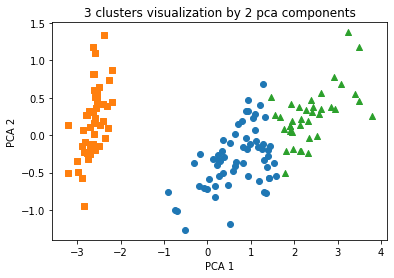

In [ ]:
#군집 값이 0,1,2인 경우마다 별도의 인덱스로 추출
marker0_ind=irisDF[irisDF['cluster']==0].index
marker1_ind=irisDF[irisDF['cluster']==1].index
marker2_ind=irisDF[irisDF['cluster']==2].index

#군집 값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o,s,^로 마커 표시.
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 clusters visualization by 2 pca components')
plt.show()

cluster1을 나타내는 네모는 명확히 구분. cluster0(동그라미)와 cluster2(세모)는 상당 수준 분리 되어 있지만 명확하진 않음.

**군집화 알고리즘 테스트를 위한 데이터 생성**

make_blobs():개별 군집의 중심점과 표준 편차 제어 기능 추가, make_classification():노이즈를 포함한 데이터를 만드는 데 유용. 하나의 클래스에 여러 개의 군집이 분포될 수 있게 데이터 생성 가능. 

make_blobs()의 간략한 사용법을 알아보면서 군집화를 위한 테스트 데이터 세트를 만드는 방법을 살펴보자. 튜플로 반환됨. 호출 파라미터는 n_samples(생성할 총 데이터의 개수), n_features, centers(int 값), cluster_std(생성될 군집 데이터의 표준 편차)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y=make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

#y target 값의 분포를 확인
unique, counts=np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


피처 데이터 세트 X는 200개의 레코드와 2개의 피처를 갖고, 군집 타깃 데이터 세트인 y는 (200,). 3개의 클러스터 값은 0,1,2이며 각각 67,67,66개로 균일하게 구성. 편하게 하기 위해 DF로 변환하자.

In [ ]:
import pandas as pd

clusterDF=pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target']=y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


make_blob로 만든 피처 데이터 세트가 어떤 군집화 분포를 갖고 만들어졌는지 살펴보자. 타깃값 0,1,2에 따라 마커를 다르게 해서 산점도 그려보면 다음과 같이 3개의 구분될 수 있는 군집 영역으로 피처 데이터 세트가 만들어짐.

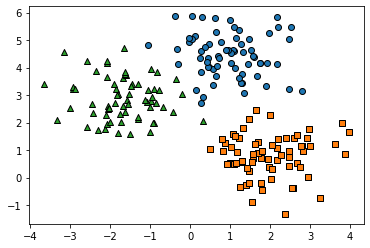

In [ ]:
target_list=np.unique(y)
#각 타깃별 산점도 마커 값
markers=['o', 's', '^', 'P', 'D', 'H', 'x']
#3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0,1,2]
#target==0, target==1. target==2로 산점도를 마커별로 생성
for target in target_list:
  target_cluster=clusterDF[clusterDF['target']==target]
  plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])
plt.show()

여기에 KMeans 군집화를 수행한 뒤에 군집별로 시각화해보자.

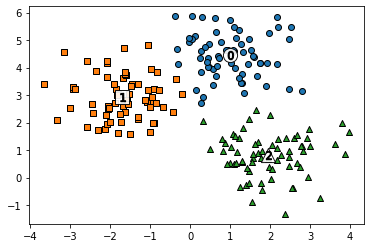

In [ ]:
#KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels=kmeans.fit_predict(X)
clusterDF['kmeans_label']=cluster_labels

#cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers=kmeans.cluster_centers_
unique_labels=np.unique(cluster_labels)
markers=['o', 's', '^', 'P', 'D', 'H', 'x']

#군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행.
for label in unique_labels:
  label_cluster=clusterDF[clusterDF['kmeans_label']==label]
  center_x_y=centers[label]
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

  #군집별 중심 위치 좌표 시각화
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$'%label)

plt.show()

make_blobs()의 타깃과 kmeans_label은 군집 번호를 의미하므로 서로 다른 값으로 매핑될 수 있음.

In [ ]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


타깃 0이 cluster label 0으로, target 1이 label 2로, target 2가 label 1로 대부분 잘 매핑됨.

>**02. 군집 평가**

대부분의 군집화 데이터는 이렇게 비교할만한 타깃 레이블 없음. 군집화의 성능을 평가하는 대표적인 방법 실루엣 분석.

**실루엣 분석의 개요**

각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지 나타낸다. 개별 데이터가 가지는 군집화 지표인 실루엣 계수 기반. 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼 있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리 되어있는지를 나타내는 지표. -1에서 1 사이의 값을 가지며 1에 가까울수록 근처 군집과 멀리 떨어져 있다는 뜻. -값은 아예 다른 군집에 데이터 포인트가 할당되었음을 의미.

메서드는 

sklearn.metrics.silhouette_samples(X, labels, metric='euclidean', **kwds)

skelarn.metrics.silhouette_score(X, labels, metric='euclidean', sample_size=None, **kwds)

좋은 군집화는 1. silhouette_score 값이 0~1 사이에 있고 1에 가깝, 2. 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야한다.

**붓꽃 데이터 세트를 이용한 군집 평가**


In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

#실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris=load_iris()
feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF=pd.DataFrame(data=iris.data, columns=feature_names)
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster']=kmeans.labels_

#iris의 모든 개별 데이터에 실루엣 계수 값을 구함
score_samples=silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

#irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff']=score_samples

#모든 데이터의 평균 실루엣 계수 값을 구함
average_score=silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score:{0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score:0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


평균 실루엣 계수 값이 0.553. 군집별 평균 실루엣 계수 값을 알아보자.

In [ ]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

**군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법**

전체 데이터의 평균 실루엣 계수 값이 높다고 반드시 최적의 군집 개수로 군집화가 되었다고 볼 수는 없음. 

여러 개의 군집 개수가 주어졌을 때 이를 분석한 표를 참고해 평균 실루엣 계수로 군집 개수를 최적화하는 방법을 알아보자.

주어진 데이터에 대해 군집 개수 2개를 정했을 때. 1번 군집 모든 데이터는 평균 실루엣 계수 값 이상이지만, 2번 군집은 평균보다 작은 데이터가 많다. 3개일 때도 마찬가지일수 있음. 4개일 때. 비교적 개별 군집의 평균 실루엣 계수 값이 비교적 균일하게 위치하고 있음. 2개일때보다 평균 실루엣 계수 값 작지만 여기선 4개인 경우가 가장 이상적인 군집화 개수임.

visualize_silhouette()은 내부 파라미터로 여러개의 군집 개수를 리스트로 갖는 첫 번째 파라미터와 피처 데이터 세트인 두 번째 파라미터를 갖고 있음. 피처 데이터 세트 X_features에 대해 군집이 2,3,4,5개일때 군집별 평균 실루엣 계수 값을 알고 싶다면

visualize_silhouette([2,3,4,5], X_features) 호출.

make_blobs() 함수 통해 4개의 군집 중심의 500개 2차원 데이터 세트를 만들고 이를 K-평균으로 군집화할 때 2,3,4,5개 중 최적의 군집 개수를 시각화로 알아보니 앞에서 본 바와 같이 4개일 때 가장 최적.

붓꽃 데이터로 보니 2개 군집이 가장 좋아 보임. 나머지는 편차가 큼.

실루엣 계수를 통한 평가 방법은 직관적이지만 수행 시간이 문제. 군집별로 임의의 데이터를 샘플링해 실루엣 계수를 평가하는 방안을 고려해야함.

>**03. 평균 이동**

**평균 이동의 개요**

K-평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이며 군집화 수행. 하지만 K-평균은 평균 거리 중심으로 이동, 평균 이동은 중심을 데이터가 모여 있는 밀도가 높은 곳으로 이동.

데이터의 분포도를 이용해 군집 중심점을 찾음. 확률 밀도 함수 이용. KDE 이용. KDE는 커널 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적 방법. KDE는 개별 관측 데이터에 커널 함수를 적용한 뒤, 이 적용 값을 모두 더한 후 개별 관측 데이터의 건수로 나눠 확률 밀도 함수를 추정하며, 대표적 커널 함수로 가우시안 분포 함수 사용.

대역폭 h를 어떻게 설정하냐에 따라 확률 밀도 추정 성능 크게 좌우. 작은 h=1은 좁고 뾰족한 KDE -> 변동성 커서 과적합 하기 쉬움, 큰 h=10은 과도하게 평활화 된 KDE -> 지나치게 단순화된 방식으로 추정하여 과소적합 하기 쉬움. 따라서 h 계산은 매우 중요. 일반적으로 평균 이동 군집화는 대역폭 클수록 평활화된 KDE로 인해 적은 수의 군집 중심점을 가지며 작을수록 많은 군집 중심점을 갖는다. MeanShift 클래스 제공. 초기화 파라미터 bandwidth가 KDE의 대역폭 h와 동일. 최적의 대역폭 계산 위해 estimate_bandwidth() 함수 제공.

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y=make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift=MeanShift(bandwidth=0.8)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


군집이 6개로 분류됨. 지나치게 세분화됨. bandwidth 살짝 높여 수행해보자.

In [ ]:
meanshift=MeanShift(bandwidth=1)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


3개 군집으로 잘 군집화 됨. meanshift에서는 bandwidth를 최적화 값으로 잘 설정하는 것이 매우 중요. estimate_bandwidth() 제공.

In [ ]:
from sklearn.cluster import estimate_bandwidth

bandwidth=estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth, 3))

bandwidth 값: 1.816


In [ ]:
#이거로 수행해보자
import pandas as pd

clusterDF=pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target']=y

#estimate_bandwidth로 최적의 bandwidth 계산
best_bandwidth=estimate_bandwidth(X)

meanshift=MeanShift(bandwidth=best_bandwidth)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


어쨌든 3개 군집. 구성된 3개 군집 시각화해보자. 평균 이동도 군집 중심 좌표 표시 가능.

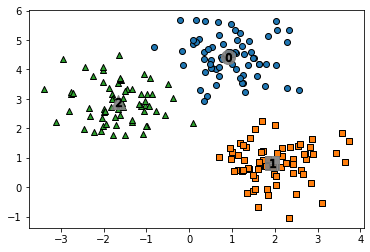

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']=cluster_labels
centers=meanshift.cluster_centers_
unique_labels=np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
  label_cluster=clusterDF[clusterDF['meanshift_label']==label]
  center_x_y=centers[label]

  #군집별로 다른 마커로 산점도 적용
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

  #군집별 중심 표현
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$'%label)

plt.show()

target 값과 군집 label 값 비교해보자. 잘 매칭됨.

In [ ]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


평균 이동의 장점은 가정 없어서 좀 더 유연한 군집화 가능한 것. 이상치 영향력도 크지 않고 군집 개수를 정할 필요도 없음. 하지만 역시 시간이 문제고 bandwidth에 따라 군집화 영향도가 매우 크다. 따라서 컴퓨터 비전 영역에서 더 많이 사용.

>**04. GMM(Gaussian Mixture Model)**

**GMM 소개**

데이터가 여러개의 가우시안 분포=정규분포를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정 하에 군집화를 수행하는 방식. 전체 데이터 세트는 서로 다른 정규 분포 형태를 가진 여러 가지 확률 분포 곡선으로 구성될 수 있고 이러한 서로 다른 정규 분포에 기반해 군집화를 수행하는 것이 GMM 군집화 방식. 모수 추정을 위해 EM 방법 적용. GaussianMixture 클래스 지원.

**GMM을 이용한 붓꽃 데이터 세트 군집화**

GMM은 확률 기반 군집화, K-평균은 거리 기반 군집화. 두 방식 비교해보자.

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

#좀더 편리한 데이터 핸들링 위해 DF로 변환
irisDF=pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target']=iris.target

GaussianMixture 객체의 가장 중요한 초기화 파라미터는 n_components. 모델의 총 개수. 

In [2]:
from sklearn.mixture import GaussianMixture

gmm=GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels=gmm.predict(iris.data)

#군집화 결과를 irisDF의 'gmm_cluster' 칼럼명으로 저장
irisDF['gmm_cluster']=gmm_cluster_labels
irisDF['target']=iris.target

#target 값에 따라 gmm_cluster 값이 어떻게 매핑되었는지 확인.
iris_result=irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


target0은 cluster0으로, target2는 cluster1로 모두 잘 매핑됨. target1만 다르게 매핑됨. K-평균 군집화 결과보다 더 효과적인 결과가 도출됨! K-평균 군집화 수행한 결과 보자.

In [3]:
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris.data)
kmeans_cluster_labels=kmeans.predict(iris.data)
irisDF['kmeans_cluster']=kmeans_cluster_labels
iris_result=irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


하지만 어떤 알고리즘이 더 뛰어나다는 이야기가 아님. 붓꽃 데이터 세트에는 GMM 군집화가 더 효과적이라는 것. K-평균은 평균 거리 중심으로 중심 이동하며 군집화 수행하는 방식이므로 개별 군집 내의 데이터가 원형으로 흩어진 경우 효과적.

**GMM과 K-평균의 비교**

KMeans는 원형 범위에서 군집화 수행. make_blobs() 군집 수를 3으로 하되, cluster_std를 0.5로 설정해 군집 내 데이터를 뭉치게 유도한 데이터 세트에 KMeans 적용해보면 효과적. cluster_std 작게 설정하면 원형 형태로 분산됨.

하지만 원형 아니면? 타원이면 군집화 잘 못함. visualize_cluster_plot 함수 만들어 시각화 가능. 여기서 KMeans 수행할 경우, 주로 원형 영역 위치로 개별 군집화가 되면서 원하는 방향으로 구성되지는 않음. 이때 GMM으로 군집화해보자. 데이터가 분포된 방향에 따라 정확하게 군집화됨. 

make_blobs()의 타깃 값과 KMeans, GMM의 군집 라벨 값을 서로 비교해보자. KMeans의 경우 군집 1번만 정확히 매핑되지만 나머지 군집은 타깃 값과 어긋나는 경우 발생. 하지만 GMM은 군집이 타깃 값과 잘 매핑됨. GMM은 유연하게 다양한 데이터에 잘 적용되지만 수행 시간이 오래 걸림.



>**05. DBSCAN**

**DBSCAN 개요**

밀도 기반 군집화 Density Based Spatial Clustering of Applications with Noise. 간단 직관 그리고 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화 가능. 예를 들어 내부의 원 모양과 외부의 원 모양 형태의 분포를 가진 데이터 세트 가정하면 K 평균, 평균 이동, GMM으로는 효과적 군집화 어렵다. 이때 DBSCAN. 

중요 파라미터 두 가지는 입실론 주변 영역:개별 데이터 중심으로 입실론 반경을 가지는 원형 영역, 최소 데이터 개수:개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수.

입실론 주변 영역 내에 포함되는 최소 데이터 개수를 충족시키는가 아닌가에 따라 데이터 포인트 정의해보자.
 * 핵심 포인트 : 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우 해당 데이터를 핵심 포인트라고 한다.
 * 이웃 포인트 : 주변 영역 내 위치한 타 데이터
 * 경계 포인트 : 주변 영역 내 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터
 * 잡음 포인트 : 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않은 데이터

 1. p1부터 p12까지 데이터세트. 특정 입실론 반경 내 포함될 최소 데이터 세트를 6개로 가정.
 2. p1 데이터 기준으로 입실론 반경 내 포함된 데이터 7개. 최소 데이터 만족하므로 p1은 핵심 포인트.
 3. p2 데이터 역시 만족하므로 핵심 포인트.
 4. 핵심 포인트 p1의 이웃 데이터 포인트 p2 역시 핵심 포인트인 경우 직접 접근 가능.
 5. 특정 핵심 포인트에서 직접 접근 가능한 다른 핵심 포인트를 서로 연결하며 군집화 수행. 이렇게 점차적으로 군집 영역으로 확장해 나가는 것이 DBSCAN 군집화 방식.
 6. p3 데이터의 경우 반경 내에 포함되는 이웃 데이터가 적어서 핵심 포인트 될 수 없음. 하지만 이웃 데이터 중에 핵심 포인트인 p2를 가짐. 경계 포인트라고 함. 경계 포인트는 군집의 외곽을 형성.
 7. p5와 같이 반경 내에 최소 데이터도 없고 핵심 포인트도 이웃 포인트 데이터로 가지고 있지 않은 데이터가 잡음 포인트.

이렇게 입실론 주변 영역의 최소 데이터 개수를 포함하는 밀도 기준을 충족시키는 데이터인 핵심 포인트 연결하며 군집화를 수행하는게 DBSCAN. DBSCAN 클래스 지원.

**DBSCAN 적용하기 - 붓꽃 데이터 세트**


In [4]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels=dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster']=dbscan_labels
irisDF['target']=iris.target

iris_result=irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


-1 등장. 노이즈에 속하는 군집을 의미. 위 데이터는 DBSCAN에서 0과 1 두 개의 군집으로 군집화됨. target 값 유형이 3가지인데 군집이 2개라고 효율 떨어지는건 아님. 개수 지정은 무의미.

2차원 평면에서 표현하기 위해 pca 이용해 2개 피처로 압축 변환한 뒤, 앞에서 사용한 visualize_cluster_plot 함수로 시각화해보자. 별표가 노이즈. pca로 2차원으로 표현하면 이상치인 노이즈 데이터가 명확히 드러난다. DBSCAN에서는 군집 개수로 군집을 강제하지 않는 것이 좋음. 최적의 군집을 찾는 게 중요. eps 값 크게 하면 반경 커져 노이즈 데이터 개수 적어짐. min_samples 크게 하면 노이즈 커짐. 시각화로 확인 가능.

In [5]:
dbscan=DBSCAN(eps=0.6, min_samples=16, metric='euclidean')

In [6]:
dbscan_labels=dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster']=dbscan_labels
irisDF['target']=iris.target

iris_result=irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


노이즈가 기존보다 많이 증가함.

**DBSCAN 적용하기 - make_circles() 데이터 세트**

복잡한 기하학적 분포를 가지는 데이터 세트에서 DBSCAN과 다른 알고리즘 비교해보자. make_cirles()로 내부 원과 외부 원 형태의 2차원 데이터 생성하자.

In [7]:
from sklearn.datasets import make_circles

X, y=make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF=pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target']=y

먼저 K-평균과 GMM은 이 데이터를 어떻게 군집화할까.

In [8]:
#kmeans로 make_circles() 데이터 세트 군집화 수행
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels=kmeans.fit_predict(X)
clusterDF['kmeans_cluster']=kmeans_labels

시각화해보면 위, 아래 군집 중심을 기반으로 위, 아래 절반으로 군집화됨. 거리 기반으로는 위처럼 데이터가 특정 형태로 지속해서 이어지는 부분을 찾아내기 어렵다.

GMM도 적용해보자.

In [10]:
#GMM으로 make_circles() 데이터 세트를 군집화 수행.
from sklearn.mixture import GaussianMixture

gmm=GaussianMixture(n_components=2, random_state=0)
gmm_label=gmm.fit(X).predict(X)
clusterDF['gmm_cluster']=gmm_label

시각화해보면 마찬가지.

이제 DBSCAN 적용해보자.

In [11]:
#dbscan으로 make_circles() 데이터 세트 군집화 수행.
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels=dbscan.fit_predict(X)
clusterDF['dbscan_clsuter']=dbscan_labels


시각화해보니 잘 되었음. 원하는 방향으로 정확히 군집화됨.